# Home Assignment No. 1
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### BEGIN Your imports
### END Your imports

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its columns
by the mean within that column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [2]:
def center(arr):
    """Center each column of a matrix by the mean value in that column.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution
    
    arr = np.array(arr)
    out = arr - arr.mean(axis=0)
    
    ### END Solution

    return out

**Example:**

In [3]:
a = np.random.randint(0, 20, (3, 5))
print('Original matrix:\n', a)
print('\nMean column values for matrix:\n', a.mean(axis=0))
print('\nCentered matrix:\n', center(a))

Original matrix:
 [[16 12  4 15 19]
 [14  0  7 13 12]
 [ 8 17 14 11 17]]

Mean column values for matrix:
 [12.66666667  9.66666667  8.33333333 13.         16.        ]

Centered matrix:
 [[ 3.33333333  2.33333333 -4.33333333  2.          3.        ]
 [ 1.33333333 -9.66666667 -1.33333333  0.         -4.        ]
 [-4.66666667  7.33333333  5.66666667 -2.          1.        ]]


## Task 2. Numpy Problem 2 (1 point)

Plot the **Butterfly Curve** given by the following equation:
$$x(t)=\sin(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
$$y(t)=\cos(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
for $0\leq t\leq 12\pi$. Make sure that all the folds of the wings of different levels have different color.

/home/sanityseeker/.local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


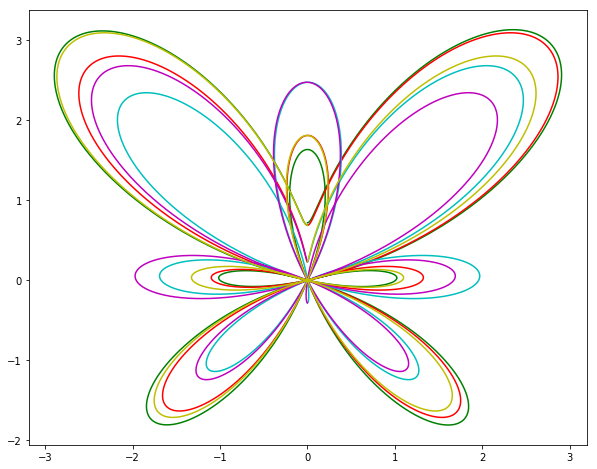

In [4]:
### BEGIN Solution
def x(t):
    return np.sin(t) * (np.exp(np.cos(t)) - 2 * np.cos(4 * t) - np.power(np.sin(t / 12), 5))

def y(t):
    return np.cos(t) * (np.exp(np.cos(t)) - 2 * np.cos(4 * t) - np.power(np.sin(t / 12), 5))

step = 1e-3
t = np.arange(0, 12 * np.pi, step) 

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['b','g','r','c','m','y']

for pi in range(1, 6):
    t_part = t[(t < pi * 2 * np.pi) & (t > np.pi * 2 * (pi - 1))]
    ax.plot(x(t_part), y(t_part), color=colors[pi])

fig.show()

## Task 3. Matplotlib (2 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

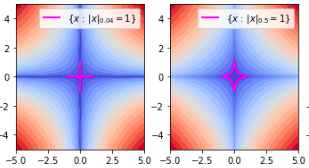

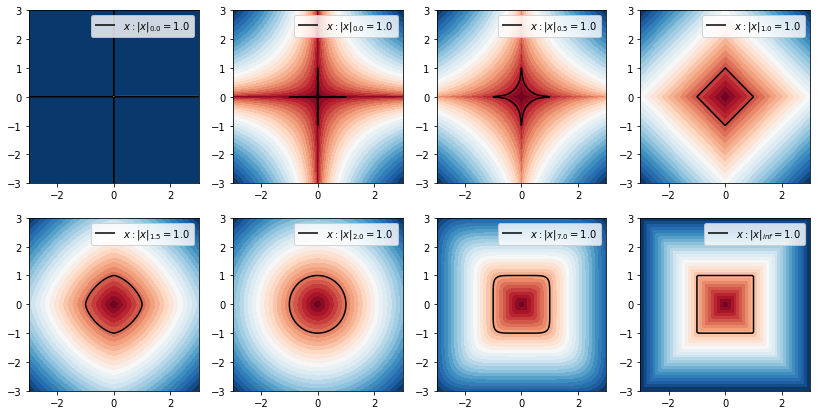

In [5]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution
    z = np.linalg.norm(np.c_[xx.ravel(), yy.ravel()], ord=p, axis=-1).reshape(xx.shape)
    ax.contourf(xx, yy, z, levels=np.linspace(z.min(), z.max(), 30), cmap=plt.cm.RdBu)
    cntr = ax.contour(xx, yy, z, levels=[1], colors='black')
    h1, l1 = cntr.legend_elements(f'x : {r"$$|x|_{"}{p:.1f}{r"}$$"}')
    ax.legend(h1, l1)
    ### END Solution

plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1=2 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to artificial $2$-dimensional dataset generated by builtin `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [6]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

### Subproblem 4.1. Decision Rule Plotting (1 of 2 points)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with small number of trees ($\leq 25$) of small depth ($\leq 4$);
* Logistic Regreesion;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

In [7]:
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import accuracy_score

In [8]:
cls_dtree = DecisionTreeClassifier(max_depth=4)
cls_forest = RandomForestClassifier(max_depth=4, n_estimators=25, n_jobs=-1, random_state=1337)
cls_logreg = LogisticRegression(multi_class='auto', max_iter=400)
cls_svm = SVC(gamma='auto')
cls_nb = GaussianNB()
cls_kn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

classifiers = [
    cls_dtree, 
    cls_forest,
    cls_logreg,
    cls_svm,
    cls_nb,
    cls_kn
]

def get_name(clf):
    return clf.__class__.__name__

/home/sanityseeker/.local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


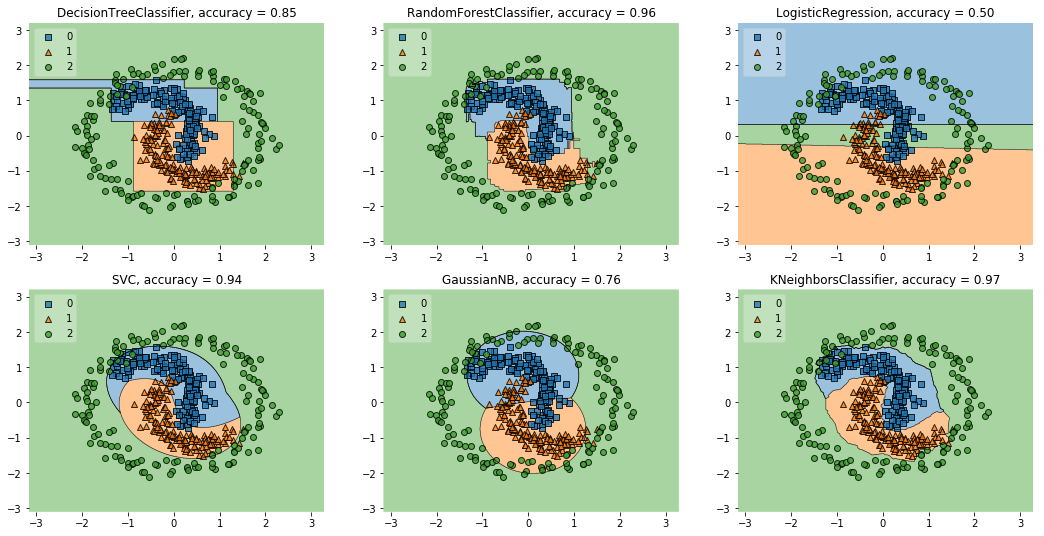

In [9]:
### BEGIN Solution

fig, axes = plt.subplots(2, 3, figsize=(18, 9))

for cls, ax in zip(classifiers, axes.flat):
    cls.fit(X, y)
    preds = cls.predict(X)
    acc = accuracy_score(y, preds)
    plot_decision_regions(X, y, clf=cls, legend=2, ax=ax)
    ax.set_title(f'{get_name(cls)}, accuracy = {acc:.2f}')
### END Solution

fig.show()

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engeneering (1 of 2 points)
In previous task 4.1 several classifiers obviously failed fitting to data. This happend because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engeneering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted featues and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

In [10]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline

In [11]:
improvement_candidates = [cls_logreg, cls_dtree]

In [12]:
def add_circular(X):
    r = X[:, 0]**2 + X[:, 1]**2
    return np.hstack((X, r.reshape(-1, 1)))

In [13]:
transformer = FunctionTransformer(add_circular)

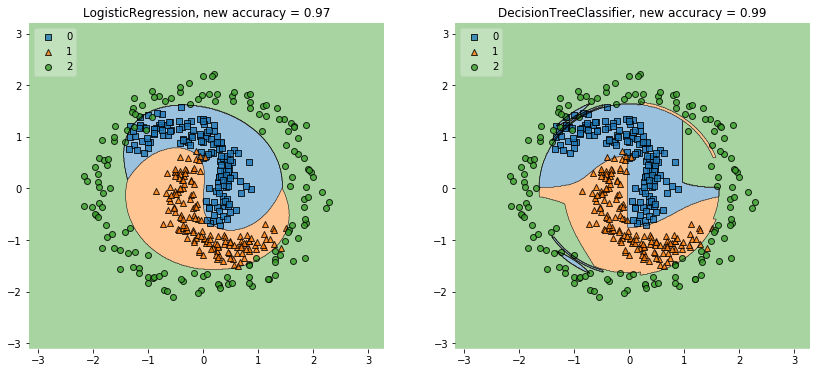

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

poly = PolynomialFeatures(3)

for cls, ax in zip(improvement_candidates, axes.flat):
    X_new = poly.fit_transform(add_circular(X))
    cls.fit(X_new, y)
    preds = cls.predict(X_new)
    acc = accuracy_score(y, preds)
    
    clf_pipeline = Pipeline([('circ', transformer), ('features', poly), ('fit', cls)])
    plot_decision_regions(X, y, clf=clf_pipeline, legend=2, ax=ax)
    ax.set_title(f'{get_name(cls)}, new accuracy = {acc:.2f}')

Both Logistic regression and Decision trees can be considered as a kind of generalization for linear models (logreg -- for the output linear dependence on sum of features; trees -- for constant prediction for each part of disjoint segments of feature space and thus a linear combination of features). That is why looking on the dataset we added a function returning radius and also added some potentionally useful polynomial features. The models above could not take into account this dependences, because they are more complex than linear, and as we can see, adding such features combinations greatly helped the models.

## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [48]:
data = pd.read_csv('data/tic-tac-toe.csv')
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
500,x,x,o,o,o,o,x,x,b,False
43,x,x,o,b,x,o,x,o,o,False
221,x,x,o,x,x,b,o,o,o,False


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for emply cell `b`.

In [49]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
667,-1,1,1,1,-1,1,-1,-1,1
671,1,1,-1,-1,1,-1,1,0,-1
709,1,0,0,-1,-1,-1,1,0,1
921,-1,0,1,-1,1,1,-1,1,-1


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem, the class balance is around $2:1$ so we still use accuracy metric.

Intuitively, this rule is logical, i.e. one may expect decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(0xBADBEEF)
test_idx = list(np.random.choice(range(len(X)), 650, replace=False))
train_idx = [i for i in range(len(X)) if i not in test_idx]

Note that we will use only $\frac{1}{3}$ of data to train and $\frac{2}{3}$ to test the model.

In [51]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
    name = clf.__class__.__name__
    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.963
SVC scored 0.972
LogisticRegression scored 0.978


We see all the models provide reasonable quality. Yet we are not satisfied!

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** on train set for optimal hyperparameter for SVM model in order to achieve 5-fold validation score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage yo use builtin `GridSearchCV` method. **Report** the validation accuracy score, test accuracy score and best found hyper parameters. **Explain** the results: does your model overfit?

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    'C': np.logspace(-2, 4, 7), 
    'gamma': np.logspace(-4, 0, 5)
    }  

In [54]:
X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]

y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]

In [55]:
gs = GridSearchCV(estimator=svm, param_grid=param_grid, refit=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
print('Best CV accuracy:', gs.best_score_)
print('Test accuracy:', accuracy_score(y_test, gs.predict(X_test)))
print('Best found hyperparams:', gs.best_params_)

Best CV accuracy: 0.9935483870967742
Test accuracy: 0.9938461538461538
Best found hyperparams: {'C': 1000.0, 'gamma': 0.01}


From the perspective of given dataset and performance on the test part of data, we may assume that the model did not overfit. Although, we should pay attention on final model parameters, that were chosen after gridsearch operations. We can see quite high values of parameter C, which means that lower values of margins are accepted and therefore the underlying decision function might be too complex to be generalized on new data. 

### Subproblem 5.2. Feature engineering for Random Forest  (1 of 2 points)
Perform **feature engeneering** for Random Forest with parameters from the example in order to achieve 5-fold validation score on train set not lower than $0.96$. **Write** 2-3 sentences to explicitly explain your motivation for provided feature choice. Fit the model on the whole train set and **provide** the test score. 

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
Xs = X.copy()

In [26]:
Xs['top_sum'] = Xs['TL'] + Xs['TM'] + Xs['TR']
Xs['middle_sum'] = Xs['ML'] + Xs['MM'] + Xs['MR']
Xs['bottom_sum'] = Xs['BL'] + Xs['BM'] + Xs['BR']
Xs['top_column_sum'] = Xs['TL'] + Xs['ML'] + Xs['BL']
Xs['middle_column_sum'] = Xs['TM'] + Xs['MM'] + Xs['BM']
Xs['bottom_column_sum'] = Xs['TR'] + Xs['MR'] + Xs['BR']
Xs['left_diag_sum'] = Xs['TL'] + Xs['MM'] + Xs['BR']
Xs['right_diag_sum'] = Xs['TR'] + Xs['MM'] + Xs['BL']

In [27]:
# Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys)
Xs_train = Xs.loc[train_idx]
Xs_test = Xs.loc[test_idx]

In [28]:
cross_val_score(rf, Xs_train, y_train, cv=5)

array([0.96774194, 0.98387097, 0.98387097, 0.98360656, 1.        ])

In [29]:
rf.fit(Xs_train, y_train)
preds = rf.predict(Xs_test)
accuracy_score(y_test, preds)

0.9876923076923076

The motivation of providing such features is simple: we help the model to take into account dependences which are essentially important to the model output. Given the fact, that number of tree estimators in our case is not so big and that simple trees randomly choose the subset of feature space, the addition of single features that alone could tell where the player won or not, should be useful.

## Task 6. Bagging Ensembles of Regressors (2 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). You goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [30]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180.0,41.84
142,425.0,106.3,0.0,151.4,18.6,936.0,803.7,56.0,64.90
610,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365.0,25.08


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstraped forest with simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in random forest the split minimizes impurity).

You have to do the following steps and answer the following questions:
* For both Forests perform the Grid Search (on the train data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal parameters output the train, validation score and the score for predicting for the test data.
* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

Some important parameters for Forests:
- n_estimators = number of trees in the foreset (more estimators -> more complex model)
- max_features = max number of features considered for splitting a node (more possibilities for features combinations on splits)
- max_depth = max depth of each tree (leads to more complex model)
- min_samples_split = min number of data points to split a node 
- min_samples_leaf = min number of data points allowed in leafs

In [31]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

In [32]:
param_grid = {
    'n_estimators': [100, 400, 600, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

In [33]:
reg_rf = RandomForestRegressor()
reg_ex = ExtraTreesRegressor()

# best_reg_rf = GridSearchCV(estimator=reg_rf, param_grid=param_grid, refit=True)
best_reg_rf = RandomizedSearchCV(estimator=reg_rf, param_distributions=param_grid,
                                 n_iter=50, cv=5, refit=True, random_state=1337)
# best_reg_ex = GridSearchCV(estimator=reg_ex, param_grid=param_grid, refit=True)
best_reg_ex = RandomizedSearchCV(estimator=reg_ex, param_distributions=param_grid,
                                 n_iter=50, cv=5, refit=True, random_state=1337)

In [34]:
best_reg_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [35]:
print('Best RF CV score (R^2):', best_reg_rf.best_score_)
print('Best RF found hyperparams:', best_reg_rf.best_params_)

best_rf_regression = best_reg_rf.best_estimator_
train_score = mean_squared_error(y_train, best_rf_regression.predict(X_train))
test_score = mean_squared_error(y_test, best_rf_regression.predict(X_test))
val_score = cross_val_score(best_rf_regression, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error)).mean()

print('MSE train score for RandomForestRegressor:', train_score) 
print('MSE val score for RandomForestRegressor:', val_score)
print('MSE test score for RandomForestRegressor:', test_score)

Best RF CV score (R^2): 0.8998756168498782
Best RF found hyperparams: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
MSE train score for RandomForestRegressor: 4.467727749844617
MSE val score for RandomForestRegressor: 27.464550007964323
MSE test score for RandomForestRegressor: 25.551554413742974


In [36]:
best_reg_ex.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [37]:
print('Best EX CV score (R^2):', best_reg_ex.best_score_)
print('Best EX found hyperparams:', best_reg_ex.best_params_)

best_ex_regression = best_reg_ex.best_estimator_
train_score = mean_squared_error(y_train, best_ex_regression.predict(X_train))
test_score = mean_squared_error(y_test, best_ex_regression.predict(X_test))
val_score = cross_val_score(best_ex_regression, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error)).mean()

print('MSE train score for ExtraTreesRegressor:', train_score) 
print('MSE val score for ExtraTreesRegressor:', val_score)
print('MSE test score for ExtraTreesRegressor:', test_score)

Best EX CV score (R^2): 0.9122044959608516
Best EX found hyperparams: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
MSE train score for ExtraTreesRegressor: 1.3196546343366025
MSE val score for ExtraTreesRegressor: 25.21501939627214
MSE test score for ExtraTreesRegressor: 22.76869878409133


Seems like both models are overfitted. The lower error on ExtraTrees can be explained by the fact that they produce more diverse trees than RandomForests (due to randomness of split vs computing optimum for each split). Generally, such trees are better when the data is noisy which might be the case in this example.


## Task 7. Multi-Class Classification Strategies (2 points)
In this task, you deal with multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Let's load the dataset.

In [38]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import f1_score

In [39]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.00,0.00,3
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

We have class disbalance here, so we must include some kind of weighting to our metric. Also, the amount of data is quite low, thus it is not a good idea to do smth like oversampling with SMOTE or subsampling. Given class disbalance we want to pay attention both recall and precicion (especially the former one in order to not "forget" completely of some class), thus the weighted F1-score might be a good candidate.

In [40]:
print(y.value_counts().sort_index())
print(y.value_counts().sort_index() / y.sum())

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64
1    0.117647
2    0.127731
3    0.028571
5    0.021849
6    0.015126
7    0.048739
Name: Type, dtype: float64


In [41]:
from time import time
from sklearn.preprocessing import scale

In [42]:
clf_dtree = DecisionTreeClassifier(max_depth=7)
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=3)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_logreg = LogisticRegression()

classifiers = [
    clf_dtree, 
    clf_forest,
    clf_logreg,
    clf_knn
]

X = scale(X)

In [43]:
def test_classifier(clf, X, y, scorer=None):
    score_res = pd.DataFrame()
    time_res = pd.DataFrame()
    clf_name = get_name(clf)
    
    score_res['type'] = [clf_name]
    time_res['type'] = [clf_name]
    
    score_res.set_index('type')
    time_res.set_index('type')
    
    ovo_clf = OneVsOneClassifier(clf)
    start = time()
    ovo_score = cross_val_score(ovo_clf, X, y, scoring=scorer, cv=5).mean()
    time_res['OneVsOne'] = [time() - start]
    score_res['OneVsOne'] = [ovo_score]
    
    ovr_clf = OneVsRestClassifier(clf)
    start = time()
    ovr_score = cross_val_score(ovr_clf, X, y, scoring=scorer, cv=5).mean()
    time_res['OneVsRest'] = [time() - start]
    score_res['OneVsRest'] = [ovr_score]
    
    start = time()
    clf_score = cross_val_score(clf, X, y, scoring=scorer, cv=5).mean()
    time_res['Multiclass'] = [time() - start]
    score_res['Multiclass'] = [clf_score]
    
    return score_res.copy(), time_res.copy()

In [44]:
result_scores = pd.DataFrame()
result_times = pd.DataFrame()

for clf in classifiers:
    ressc, restime = test_classifier(clf, X, y, scorer=make_scorer(f1_score, average='weighted'))
    result_scores = result_scores.append(ressc, ignore_index=True)
    result_times = result_times.append(restime, ignore_index=True)

In [45]:
result_scores = result_scores.transpose()
result_scores.set_axis(labels=result_scores.iloc[0], axis=1, inplace=True)
result_scores.drop('type', inplace=True)

result_times = result_times.transpose()
result_times.set_axis(labels=result_times.iloc[0], axis=1, inplace=True)
result_times.drop('type', inplace=True)

In [46]:
result_scores.head().sort_index()

type,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier
Multiclass,0.536472,0.543999,0.565599,0.604731
OneVsOne,0.590155,0.599626,0.540243,0.612684
OneVsRest,0.514578,0.571672,0.522871,0.626177


In [47]:
result_times.head().sort_index()

type,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier
Multiclass,0.0184395,0.847478,0.0832367,0.0260043
OneVsOne,0.110607,12.2367,0.343037,0.298054
OneVsRest,0.0635352,4.89386,0.181735,0.0671215


From tables above we can derive that OneVsOne method gives good results both in terms of time and metric for Decision trees. Also, OneVsRest gives good results for KNN. Generally OneVsOne method is the most time-consuming as we have to train $C^2_k$ independend classifiers (k -- number of classes), when, for example, for OneVsRest only k.  